In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss




In [48]:
# Générer un dataset de training basé sur un pattern
pattern = [1, 0, 1, 1, 0]
sequence_length = 1000  # Nombre de bits dans l'ensemble d'entraînement
buffer_size = 20














In [49]:
def generate_sequence(pattern, length):
    seq = []
    while len(seq) < length:
        seq.extend(pattern)
    return seq[:length]

# Générer une séquence de bits basée sur le pattern
bit_sequence = generate_sequence(pattern, sequence_length)


In [50]:
# Préparer les données d'entraînement
X_train = []
y_train = []
for i in range(buffer_size, len(bit_sequence)):
    X_train.append(bit_sequence[i-buffer_size:i])  # Prendre les 20 bits précédents
    y_train.append(bit_sequence[i])  # Prédire le bit suivant

X_train = np.array(X_train)
y_train = np.array(y_train)

Accuracy: 1.0
Log Loss: 9.205440590090083e-05


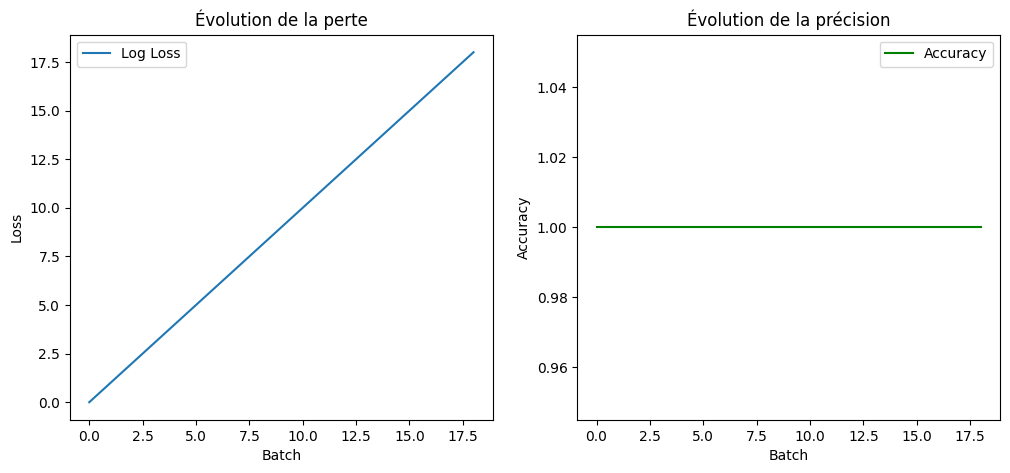

In [ ]:
# Initialiser le perceptron
perceptron = SGDClassifier(loss="log_loss", random_state=42)

# Suivi des performances
losses = []
accuracies = []

# Entraînement incrémental du modèle
batch_size = 50
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    if len(X_batch) < batch_size:
        break
    perceptron.partial_fit(X_batch, y_batch, classes=np.array([0, 1]))
    y_pred = perceptron.predict(X_batch)
    accuracies.append(accuracy_score(y_batch, y_pred))
    losses.append(log_loss(y_batch, perceptron.predict_proba(X_batch)))


print('Accuracy:', accuracy_score(y_train, perceptron.predict(X_train)))
print('Log Loss:', log_loss(y_train, perceptron.predict_proba(X_train)))

# Affichage des métriques
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(losses,label='Log Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Évolution de la perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies , label='Accuracy', color='green')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.title('Évolution de la précision')
plt.legend()

plt.show()

In [6]:
# Fonction de prédiction basée sur un buffer de 20 bits
def predict_next_bit(model, buffer):
    buffer = np.array(buffer).reshape(1, -1)
    return model.predict(buffer)[0]

# Tester avec un buffer initial
buffer_test = bit_sequence[:buffer_size]  # Prendre les 20 premiers bits
predicted_bits = []

for _ in range(20):  # Prédire les 20 prochains bits
    next_bit = predict_next_bit(perceptron, buffer_test)
    predicted_bits.append(next_bit)
    buffer_test = buffer_test[1:] + [next_bit]  # Mettre à jour le buffer

print("Bits prédits :", predicted_bits)

Bits prédits : [np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0)]
